In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import keras
import cv2
import imageio
import os
from tqdm import tqdm
import gc
import random
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [2]:
oral_cancer_path = '/kaggle/input/multi-cancer/Multi Cancer/Oral Cancer'
directories = []
for directory in os.listdir(oral_cancer_path):
    directories.append(directory)
print('Classes Present : ',list(directories))

Classes Present :  ['oral_scc', 'oral_normal']


In [3]:
oral_normal_files = []
oral_scc_files = []

for directory in directories:
    for files in os.listdir(os.path.join(oral_cancer_path,directory)):
        if directory == 'oral_normal':
            oral_normal_files.append(os.path.join(oral_cancer_path,'oral_normal',files))
        elif directory == 'oral_scc':
            oral_scc_files.append(os.path.join(oral_cancer_path,'oral_scc',files))
        

In [4]:
print('oral_normal Files : ',len(oral_normal_files))
print('oral_scc Files : ',len(oral_scc_files))

oral_normal Files :  5001
oral_scc Files :  5001


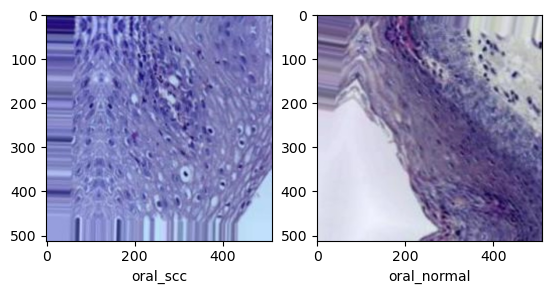

In [5]:


random_num = random.randint(0,len(oral_scc_files))
brain_tumor_pic = oral_scc_files[random_num]
brain_menin_pic = oral_normal_files[random_num]
brain_tumor_data = imageio.imread(brain_tumor_pic)
brain_menin_data = imageio.imread(brain_menin_pic)
fig,axs = plt.subplots(1,2)
axs[0].imshow(brain_tumor_data)
axs[1].imshow(brain_menin_data)
axs[0].set_xlabel('oral_scc')
axs[1].set_xlabel('oral_normal')
plt.show()

In [6]:
generator = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.4
)

In [7]:
train_ds = generator.flow_from_directory(
    '/kaggle/input/multi-cancer/Multi Cancer/Oral Cancer',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)
val_ds = generator.flow_from_directory(
    '/kaggle/input/multi-cancer/Multi Cancer/Oral Cancer',
    target_size=(100, 100),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 6002 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


In [8]:
base_model_resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(100, 100, 3))
for layer in base_model_resnet.layers:
    layer.trainable = False
x = base_model_resnet.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)
model = Model(inputs=base_model_resnet.input, outputs=predictions)
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 0s 0us/step


In [9]:
history = model.fit(train_ds,verbose = 1,epochs =20,batch_size = 32,validation_data = val_ds,)

Epoch 1/20
188/188 [==============================] - 195s 1s/step - loss: 0.5134 - accuracy: 0.7582 - val_loss: 0.5351 - val_accuracy: 0.7508
Epoch 2/20
188/188 [==============================] - 194s 1s/step - loss: 0.3768 - accuracy: 0.8276 - val_loss: 0.3434 - val_accuracy: 0.8413
Epoch 3/20
188/188 [==============================] - 194s 1s/step - loss: 0.3016 - accuracy: 0.8684 - val_loss: 0.3760 - val_accuracy: 0.8300
Epoch 4/20
188/188 [==============================] - 187s 994ms/step - loss: 0.2584 - accuracy: 0.8937 - val_loss: 0.2948 - val_accuracy: 0.8677
Epoch 5/20
188/188 [==============================] - 188s 1s/step - loss: 0.2277 - accuracy: 0.9039 - val_loss: 0.2563 - val_accuracy: 0.8900
Epoch 6/20
188/188 [==============================] - 195s 1s/step - loss: 0.2049 - accuracy: 0.9147 - val_loss: 0.2541 - val_accuracy: 0.8965
Epoch 7/20
188/188 [==============================] - 194s 1s/step - loss: 0.1918 - accuracy: 0.9200 - val_loss: 0.2598 - val_accuracy: 0.8

In [10]:
put_image_pathh = "/kaggle/input/multi-cancer/Multi Cancer/Oral Cancer/oral_normal/oral_normal_0002.jpg"
input_imagee = cv2.imread(put_image_pathh)

input_image_resizee = cv2.resize(input_imagee, (100, 100))
# input_image_scaledd = input_image_resizee / 255.0
image_reshapedd = np.reshape(input_image_resizee, [1, 100, 100, 3])
input_prediction = model.predict(image_reshapedd)
input_pred_label = np.argmax(input_prediction)
input_prediction 

1/1 [==============================] - 1s 1s/step


array([[1.0000000e+00, 4.4672394e-08]], dtype=float32)

In [11]:
input_pa ='/kaggle/input/multi-cancer/Multi Cancer/Oral Cancer'

In [42]:
a=0
b=0

In [46]:
for cond in ['/oral_normal/','/oral_scc/']:
        for img in (os.listdir(input_pa + cond)):
            img = plt.imread(input_pa+cond+img)
            img = cv2.resize(img, (100,100))
            image_reshaped = np.reshape(img, [1, 100, 100, 3])
            input_prediction = model.predict(image_reshaped)  
            input_pred_label = np.argmax(input_prediction)
            if input_pred_label==0 and cond =='/oral_normal/':
                               a=a+1
            if input_pred_label==1 and cond =='/oral_scc/' :
                                     b=b+1
                    



1/1 [==============================] - 0s 69ms/step


In [13]:
model.save('oral_cancer.h5')

error = 6.5%

In [47]:
a

4677

error = 3.5 %

In [48]:
b

4826